# Telco-customer-churn-prediction

A classification machine learning problem for predicting customers churn from the company based on customers who left within the last month labeled by 'yes' or 'no'

## Dataset
The dataset used in this project is obtained from [Kaggle - Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)
The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents


In [1]:
import seaborn as sns 
sns.set_style("darkgrid")
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix, ConfusionMatrixDisplay

# to install 'conda install -c conda-forge imbalanced-learn'
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss,CondensedNearestNeighbour

# to install 'conda install -c conda-forge xgboost'
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.neural_network import MLPClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Read the dataset

**Features**:
- `customerID`: Customer ID
- `gender`: Whether the customer is a male or a female
- `SeniorCitizen`: Whether the customer is a senior citizen or not (1, 0)
- `Partner`: Whether the customer has a partner or not (Yes, No)
- `Dependents`: Whether the customer has dependents or not (Yes, No)
- `tenure`: Number of months the customer has stayed with the company
- `PhoneService`: Whether the customer has a phone service or not (Yes, No)
- `MultipleLines`: Whether the customer has multiple lines or not (Yes, No, No phone service)
- `InternetService`: Customer’s internet service provider (DSL, Fiber optic, No)
- `OnlineSecurity`: Whether the customer has online security or not (Yes, No, No internet service)
- `OnlineBackup`: Whether the customer has online backup or not (Yes, No, No internet service)
- `DeviceProtection`: Whether the customer has device protection or not (Yes, No, No internet service)
- `TechSupport`: Whether the customer has tech support or not (Yes, No, No internet service)
- `StreamingTV`: Whether the customer has streaming TV or not (Yes, No, No internet service)
- `StreamingMovies`: Whether the customer has streaming movies or not (Yes, No, No internet service)
- `Contract`: The contract term of the customer (Month-to-month, One year, Two year)
- `PaperlessBilling`: Whether the customer has paperless billing or not (Yes, No)
- `PaymentMethod`: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- `MonthlyCharges`: The amount charged to the customer monthly
- `TotalCharges`: The total amount charged to the customer

**Target Feature**:
- `Churn`: Whether the customer churned or not (Yes or No)


### Read the dataset

In [3]:
df = pd.read_csv('Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

### Separate data for training and testing
For model evaluation on totally unseen data

In [4]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Churn'])
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)
print(train_df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     4950-BDEUX    Male              0      No         No      35   
1     7993-NQLJE    Male              0     Yes        Yes      15   
2     7321-ZNSLA    Male              0     Yes        Yes      13   
3     4922-CVPDX  Female              0     Yes         No      26   
4     2903-YYTBW    Male              0     Yes        Yes       1   
...          ...     ...            ...     ...        ...     ...   
5629  6308-CQRBU  Female              0     Yes         No      71   
5630  2842-JTCCU    Male              0      No         No       2   
5631  6402-ZFPPI  Female              1      No         No      25   
5632  3594-BDSOA  Female              0     Yes         No      24   
5633  6490-FGZAT    Male              0      No         No       6   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
0              No  No phone service             DSL                   No  ... 

In [5]:
display(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


None

- We can notice that `TotalCharges` is of the wrong data type

## Data Cleaning

1. **Converting 'TotalCharges' column to numeric**

In [6]:
train_df['TotalCharges'] = pd.to_numeric(train_df['TotalCharges'], errors='coerce')

2. **Check and handling missing values**

In [7]:
train_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

8 Null values in 'TotalCharges' column

- Fill with Mean value

In [8]:
train_df['TotalCharges'].fillna((train_df['TotalCharges'].mean()), inplace=True)

3. **Check for duplicates**

In [9]:
train_df.duplicated().sum()

0

No duplicates were found

## Exploratory Data Analysis

**Distribution of target column:**

No     4139
Yes    1495
Name: Churn, dtype: int64


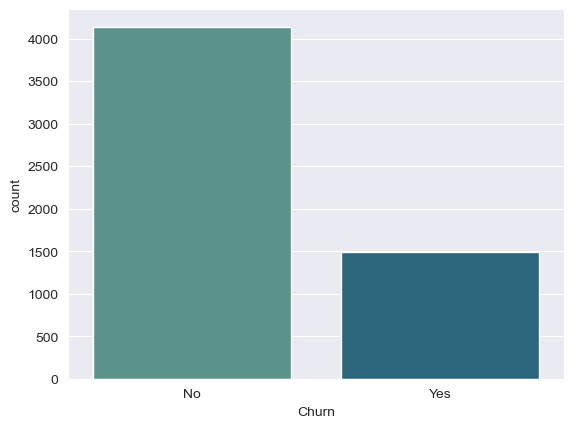

In [10]:
print(train_df['Churn'].value_counts())
_ = sns.countplot(x='Churn', data=train_df, palette='crest')

- The distribution of the binary classes shows a slight data imbalance that needs attention

**Categorical features count plot**

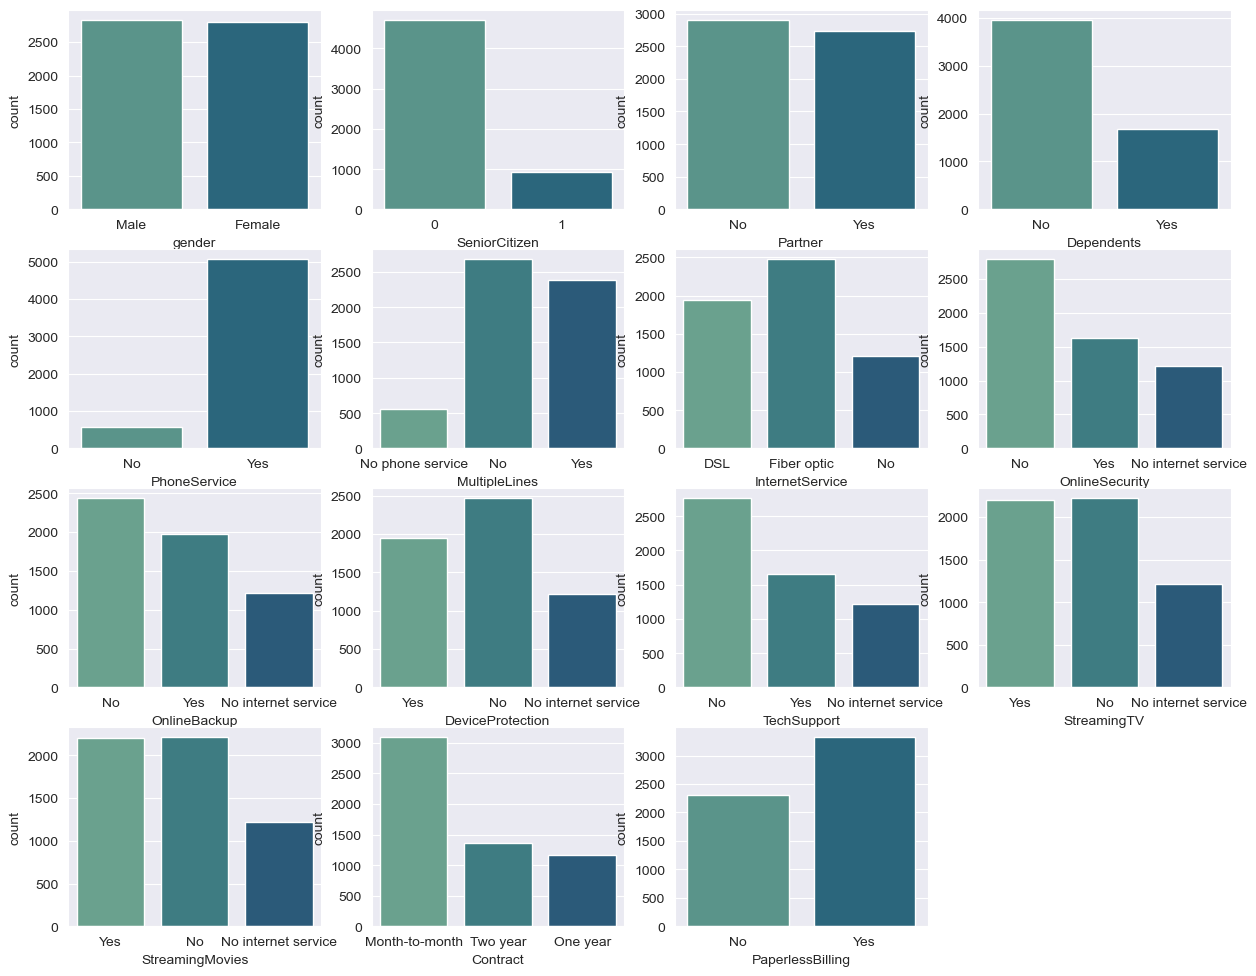

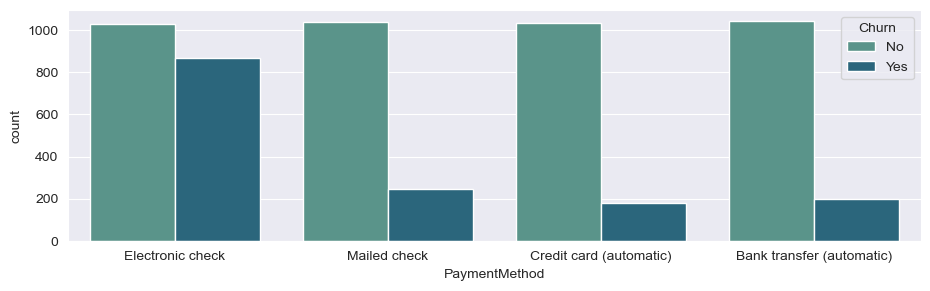

In [11]:
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
            'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
            'Contract', 'PaperlessBilling']

plt.figure(figsize=(15, 15))
for n, variable in enumerate(cat_cols):
    ax = plt.subplot(5, 4, n + 1)
    g=sns.countplot(data=train_df, x=train_df[variable], ax=ax, palette='crest')
plt.show() 

plt.figure(figsize=(11,3))
_ = sns.countplot(x= 'PaymentMethod', hue='Churn', data=train_df, palette='crest')
plt.show() 

# plt.tight_layout()

- The gender count plot shows an equally distribution of males and females in the dataset
- Some features have 'No' and 'No Internet Service' or 'No Phone Service' as a separate category which don't give new info and could all be considered as 'No' label

**Histogram & Boxplots of continuous features**

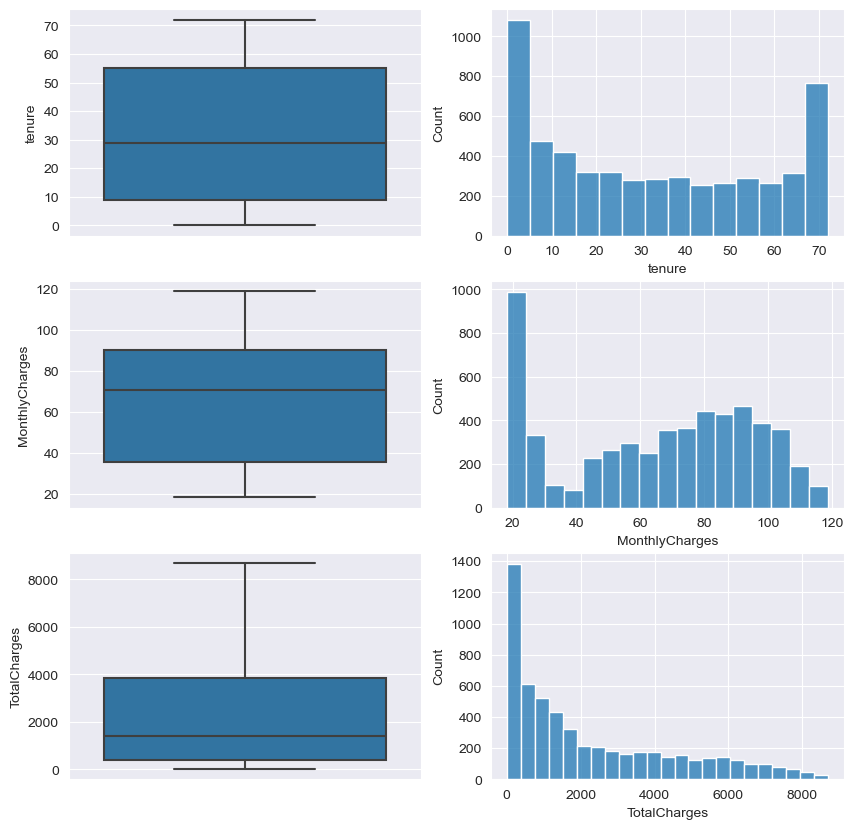

In [12]:
plt.figure(figsize=(10,10))
plt.subplot(3, 2, 1)
_ = sns.boxplot(y= train_df['tenure'])
plt.subplot(3, 2, 2)
_ = sns.histplot(x='tenure', data=train_df)

plt.subplot(3, 2, 3)
_ = sns.boxplot(y= train_df['MonthlyCharges'])
plt.subplot(3, 2, 4)
_ = sns.histplot(x='MonthlyCharges', data=train_df)

plt.subplot(3, 2, 5)
_ = sns.boxplot(y= train_df['TotalCharges'])
plt.subplot(3, 2, 6)
_ = sns.histplot(x='TotalCharges', data=train_df)

- Boxplots show that there are No outliers in the continuous variables
- Histograms show right skewness in the 'TotalCharges' feature

**Scatter plot of Monthly Charges versus Total Charges**

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

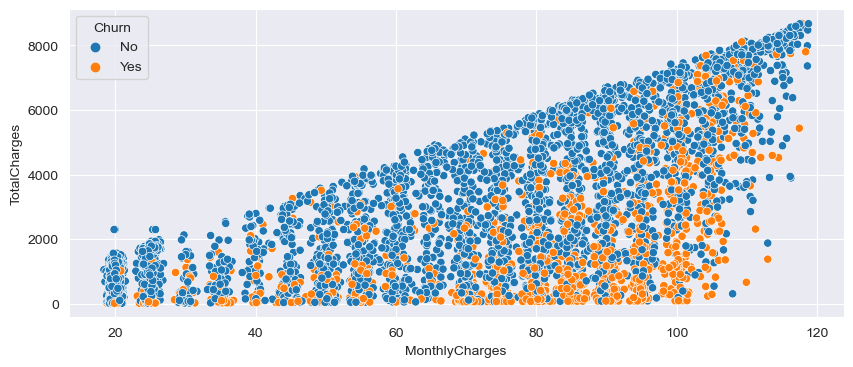

In [13]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=train_df, x='MonthlyCharges', y='TotalCharges', hue='Churn')

- This implies a positive correlation between the monthly charges, and total charges.
- The churn rate increases with the increase in monthly charges.

**Replacing 'No internet service' and 'No phone service' with 'No'**

In [14]:
train_df.replace(['No internet service','No phone service'], 'No', inplace=True)

## Encoding categorical features
- One-Hot encoding all categorical features
- Encode by mapping target feature

In [15]:
# One-hot encoding
cat_cols = ['gender', 'InternetService', 'PaymentMethod', 'Partner', 'Dependents', 'Contract', 
            'PhoneService', 'PaperlessBilling', 'MultipleLines', 'OnlineSecurity', 
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

train_df = pd.concat([train_df, pd.get_dummies(train_df[cat_cols])], axis='columns')
train_df = train_df.drop(columns=cat_cols)

# mapping 
train_df['Churn'] = np.where(train_df['Churn'] == 'Yes', 1, 0)  # yes=1, No=0

## Feature engineering

1. **Binning 'tenure' feature into 6 ranges**

Binning 'tenure' feature into 6 ranges:

- 0-12 months --> '0-1 years'
- 12-24 months --> '1-2 years'
- 24-36 months --> '2-3 years'
- 36-48 months --> '3-4 years'
- 48-60 months --> '4-5 years'
- More than 60 months --> 'more than 5 years'

In [16]:
condition = [((train_df.tenure >= 0) & (train_df.tenure <= 12)), 
             ((train_df.tenure > 12) & (train_df.tenure <= 24)), 
             ((train_df.tenure > 24) & (train_df.tenure <= 36)),
             ((train_df.tenure > 36) & (train_df.tenure <= 48)),
             ((train_df.tenure > 48) & (train_df.tenure <= 60)), 
             (train_df.tenure > 60)]

choice = [0, 1, 2, 3, 4, 5]
train_df['tenure_range'] = np.select(condition, choice)

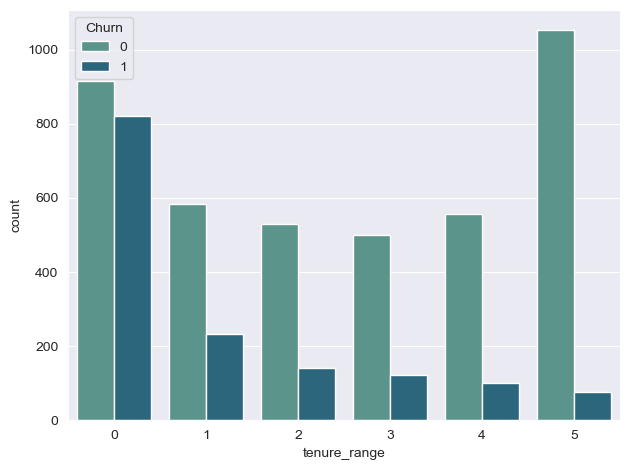

In [17]:
_ = sns.countplot(x= 'tenure_range', hue='Churn', data=train_df, palette='crest', order=choice)
plt.tight_layout()

- We can notice that customers who stay longer are more loyal to the company and very small number who leave after staying more than 4 years. On the other hand, customers churn rate is very high during the first year.

## Feature Scaling

- Log transform

log transformation is very powerful in feature scaling specially with skewed data, hence, np.log1p() is applied on 'MonthlyCharges' and 'TotalCharges' features and with trials it proved giving the best results over MinMaxScaler() and StandaredScaler().

In [18]:
train_df['MonthlyCharges']=np.log1p(train_df['MonthlyCharges'])
train_df['TotalCharges']=np.log1p(train_df['TotalCharges'])

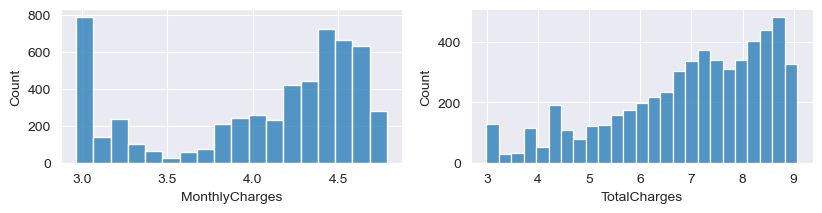

In [19]:
plt.figure(figsize=(15,2))
plt.subplot(1, 3, 2)
_ = sns.histplot(x='MonthlyCharges', data=train_df)

plt.subplot(1, 3, 3)
_ = sns.histplot(x='TotalCharges', data=train_df)

## Handling data imbalance

Data imbalance affects machine learning models by tending only to predict the majority class and ignoring the minority class, hence, having major misclassification of the minority class in comparison with the majority class. Hence, we use techniques to balance class distribution in the data.

Even that our data here doesn't have severe class imbalance, but handling it shows results improvement. Using SMOTE (Synthetic Minority Oversampling Technique) library that randomly increases the minority class which is 'yes' in our case.

SMOTE synthetically creates new records of the minority class by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. Here, k=5 neighbors is used.

In [20]:
X_train = train_df.drop(columns=['customerID', 'Churn'])
y_train = train_df['Churn']

In [21]:
sm = SMOTE(random_state = 0, sampling_strategy = 'minority', k_neighbors=5)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

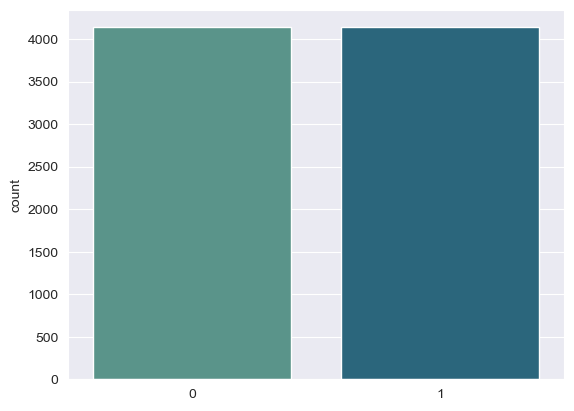

In [22]:
_ = sns.countplot(x=y_train, palette='crest')

### Preprocessing function on Test set
A function is created to apply all previous preprocessing steps on the test set

In [23]:
def test_prep (test_df):
    # Data cleaning
    # Converting 'TotalCharges' column to numeric
    test_df['TotalCharges'] = pd.to_numeric(test_df['TotalCharges'], errors='coerce')
    
    # Replacing 'No internet service' and 'No phone service' with 'No'
    test_df.replace(['No internet service','No phone service'], 'No', inplace=True)
    
    # if there is null values in the continuous features --> fill with the mean of columns in training set (mapping)
    for col in test_df.columns:
        if test_df[col].isna().sum() > 0:
            test_df[col] = test_df[col].fillna(train_df[col].map(np.mean))
            
    # Categorical features encoding 
    test_df = pd.concat([test_df, pd.get_dummies(test_df[cat_cols])], axis='columns')
    test_df = test_df.drop(columns=cat_cols)
    
    test_df['Churn'] = np.where(test_df['Churn'] == 'Yes', 1, 0)
            
    # Feature engineering
    # Binning 'tenure' feature into 6 ranges
    condition = [((test_df.tenure >= 0)&(test_df.tenure <= 12)), 
                 ((test_df.tenure > 12)&(test_df.tenure <= 24)), 
                 ((test_df.tenure > 24)&(test_df.tenure <= 36)),
                 ((test_df.tenure > 36)&(test_df.tenure <= 48)),
                 ((test_df.tenure > 48)&(test_df.tenure <= 60)), 
                 (test_df.tenure > 60)]
    choice = [0, 1, 2, 3, 4, 5]
    test_df['tenure_range'] = np.select(condition, choice)
    
    # Feature Scaling
    test_df['MonthlyCharges']=np.log1p(test_df['MonthlyCharges'])
    test_df['TotalCharges']=np.log1p(test_df['TotalCharges'])
    
    return test_df

In [24]:
test_df = test_prep(test_df)
test_df

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,...,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure_range
0,4376-KFVRS,0,72,4.745367,9.044191,0,0,1,0,1,...,1,0,1,0,1,0,1,0,1,5
1,2754-SDJRD,1,8,4.616605,6.812950,0,1,0,0,1,...,0,1,0,0,1,0,1,0,1,0
2,9917-KWRBE,0,41,4.373868,8.074711,0,1,0,1,0,...,1,0,1,1,0,0,1,1,0,3
3,0365-GXEZS,0,18,4.371976,7.292848,0,0,1,0,1,...,0,0,1,0,1,1,0,1,0,1
4,9385-NXKDA,0,72,4.426641,8.686151,0,1,0,1,0,...,1,0,1,1,0,0,1,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,5204-HMGYF,0,49,4.479607,8.377011,0,1,0,1,0,...,1,0,1,0,1,0,1,0,1,4
1405,9950-MTGYX,0,28,3.058707,6.192260,0,0,1,0,0,...,0,1,0,1,0,1,0,1,0,2
1406,3675-EQOZA,0,5,3.075005,4.549129,0,0,1,0,0,...,0,1,0,1,0,1,0,1,0,0
1407,3646-ITDGM,0,56,3.030134,6.959304,0,1,0,0,0,...,0,1,0,1,0,1,0,1,0,4


In [25]:
X_test = test_df.drop(columns=['customerID', 'Churn'])
y_test = test_df['Churn']

## Model training
Four different models were applied on the data and all results are reported with confusion matrix and classification report showing the precision, recall, and f1-score metrics.

- Logistic regression Best parameters after several trials: C=200 (very large c value trying to fit the data as possible without overfitting), max_iter=1000
- Support vector classifier Best prameters: kernel='linear', C=20
- XGBoost classifier RandomizedSearchCV is used for hyperparameters tuning with StratifiedKFold of 5 splits.
- Multi-layer Perceptron (MLP) classifier.

1. **Logistic Regression**

In [26]:
model_logReg = LogisticRegression(C=200, max_iter=1000)

scores = cross_val_score(model_logReg, X_train, y_train, cv=10, scoring="f1")
print(scores)
model_logReg.fit(X_train, y_train)

[0.65588235 0.6497006  0.63926941 0.7833109  0.94444444 0.93103448
 0.93636364 0.91940976 0.92482916 0.9307605 ]


LogisticRegression(C=200, max_iter=1000)

**Testing the model**

In [27]:
log_pred = model_logReg.predict(X_test)

- **Confusion matrix**

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

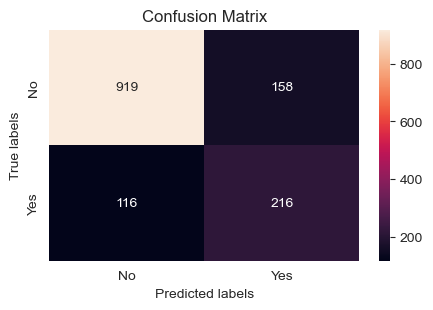

In [28]:
cm = confusion_matrix(log_pred, y_test)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

- **Classification report**

In [29]:
print(classification_report(y_test, log_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.85      0.89      0.87      1035
         Yes       0.65      0.58      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



## 2- SVM model

In [30]:
model_svm = SVC(kernel='linear', C=20)
scores = cross_val_score(model_logReg, X_train, y_train, cv=10, scoring="f1")
print(scores)

model_svm.fit(X_train, y_train)

[0.65588235 0.6497006  0.63926941 0.7833109  0.94444444 0.93103448
 0.93636364 0.91940976 0.92482916 0.9307605 ]


SVC(C=20, kernel='linear')

**Testing the model**

In [31]:
svm_pred = model_svm.predict(X_test)

- **Confusion matrix**

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

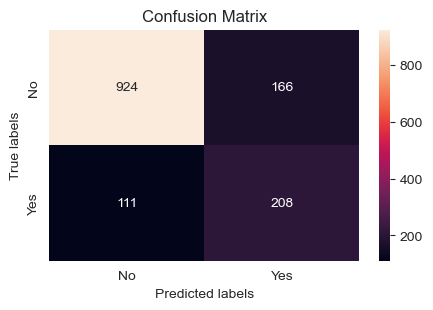

In [32]:
cm = confusion_matrix(svm_pred, y_test)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

- **Classification report**

In [33]:
print(classification_report(y_test, svm_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.85      0.89      0.87      1035
         Yes       0.65      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409



## 3- XGBoost model

In [34]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [1.5, 2, 5, 7],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [ 4, 5, 8]
        }

model_xgb = xgb.XGBClassifier(learning_rate= 0.08, n_estimators=100, objective='binary:logistic', silent=True, verbose=-1)

skf = StratifiedKFold(n_splits= 5, shuffle = True, random_state = 0)
random_search = RandomizedSearchCV(model_xgb, param_distributions=params, n_iter=5, scoring='roc_auc', 
                                   n_jobs=2,cv=skf.split(X_train, y_train), verbose=-1, random_state=0)

_= random_search.fit(X_train, y_train)
print(random_search.best_estimator_)

[14:20:25] WARNING: D:\bld\xgboost-split_1667849704519\work\src\learner.cc:767: 
Parameters: { "silent", "verbose" } are not used.

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.08, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=8, max_leaves=0, min_child_weight=10, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)


**Testing the model**

In [35]:
xgb_pred = random_search.predict(X_test)

- **Confusion matrix**

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

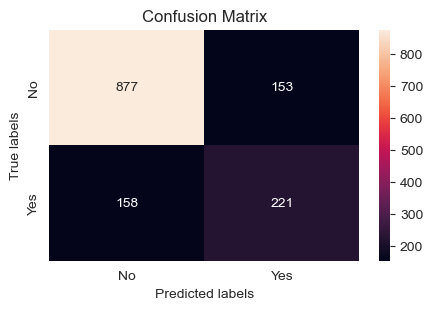

In [36]:
cm = confusion_matrix(xgb_pred, y_test)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

- **Classification report**

In [37]:
print(classification_report(y_test, xgb_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.85      0.85      0.85      1035
         Yes       0.58      0.59      0.59       374

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



## 4- MLP model

In [38]:
model_mlp= MLPClassifier(random_state=1, max_iter=500)
scores = cross_val_score(model_mlp, X_train, y_train, cv=10, scoring="f1")
print(scores)

model_mlp.fit(X_train, y_train)

[0.63755459 0.6874116  0.69230769 0.77368421 0.93138358 0.93002257
 0.93303065 0.89393939 0.92776524 0.92446449]


MLPClassifier(max_iter=500, random_state=1)

**Testing the model**

In [39]:
mlp_pred = model_mlp.predict(X_test)

- **Confusion matrix**

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

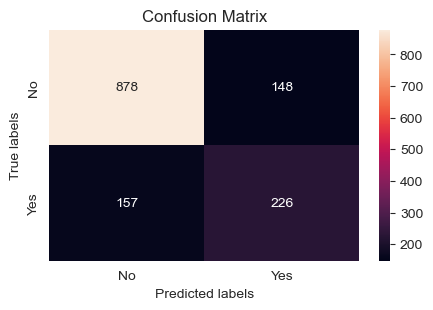

In [40]:
cm = confusion_matrix(mlp_pred, y_test)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

- **Classification report**

In [41]:
print(classification_report(mlp_pred,y_test, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.85      0.86      0.85      1026
         Yes       0.60      0.59      0.60       383

    accuracy                           0.78      1409
   macro avg       0.73      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409

